In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''
Q.1:Import libraries (Numpy, pandas, matplotlib, plotly and seaborn)
and then read csv file.
'''


#Reading the csv file
menu_data = pd.read_csv('/content/drive/MyDrive/AICP/menu.csv')

# Displaying the first few rows of the dataset to verify it's loaded correctly or not
menu_data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [ ]:
'''
Q.2: Check statistical facts by checking all columns. Then calculate the maximum value of the following
attributes ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A (%
Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']
'''

statistical_facts = menu_data.describe()
print(statistical_facts)

          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

In [ ]:
# Calculating the maximum value of the target attributes
# ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A (%
# Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']

attributes = ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein',
              'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']
max_values = menu_data[attributes].max()
max_values

Calories                     1880.0
Total Fat                     118.0
Carbohydrates                 141.0
Dietary Fiber                   7.0
Sugars                        128.0
Protein                        87.0
Vitamin A (% Daily Value)     170.0
Vitamin C (% Daily Value)     240.0
Calcium (% Daily Value)        70.0
Iron (% Daily Value)           40.0
dtype: float64

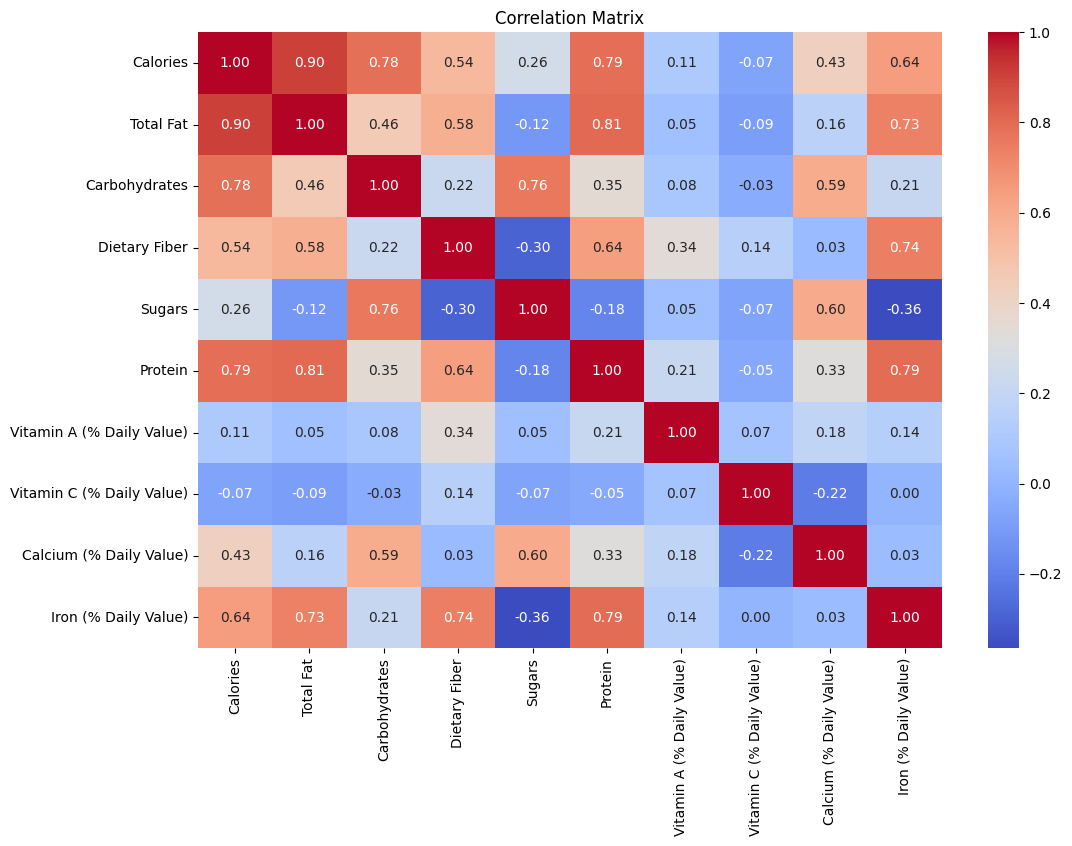

In [ ]:
'''
Q.3:Check to see if infact there is any correlation between Calories and other independent variables by
plotting a correlation matrix next
'''

correlation_matrix = menu_data[attributes].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

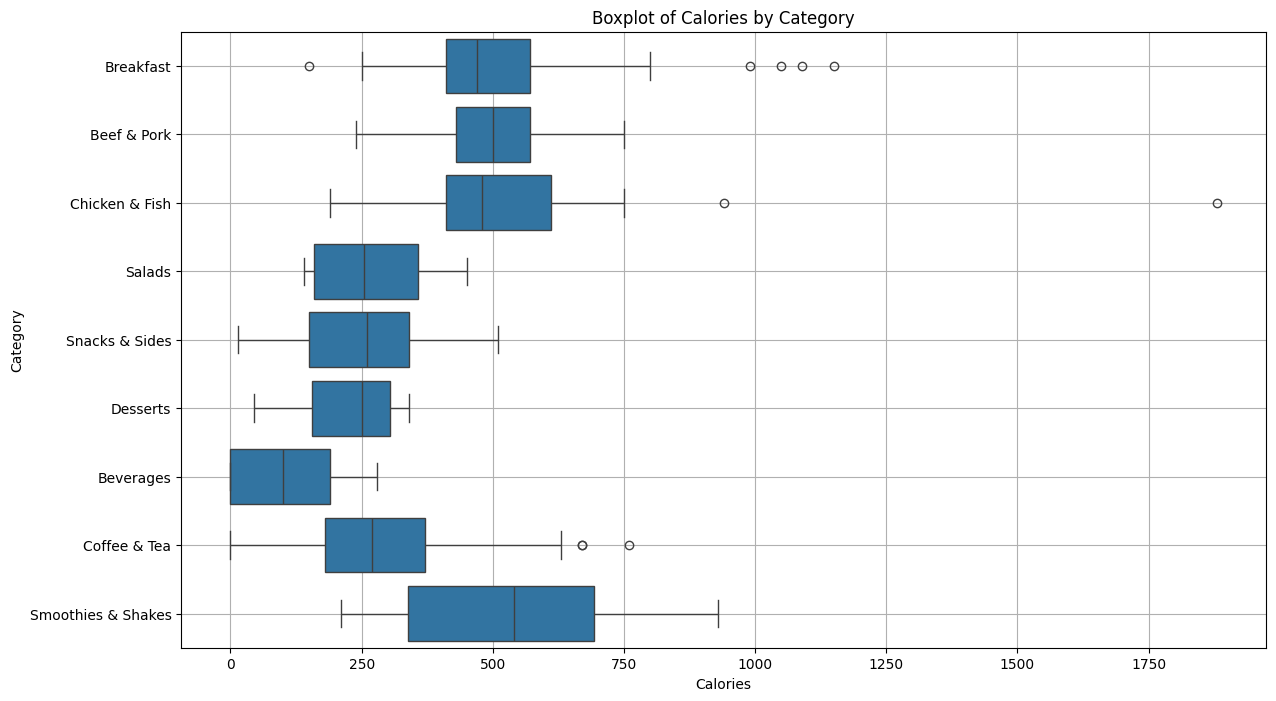

In [ ]:
'''
Q.4: Draw boxplot for Calories vs Category to spot outliers and max calories category
'''
plt.figure(figsize=(14, 8))
boxplot = sns.boxplot(x='Calories', y='Category', data=menu_data)

# Enhancing the plot for better readability
boxplot.set_title('Boxplot of Calories by Category')
boxplot.set_xlabel('Calories')
boxplot.set_ylabel('Category')
plt.grid(True)

plt.show()


In [ ]:
'''
Q5: Figure out which exact item contains a high quantity for ['Calories', 'Total Fat', 'Carbohydrates',
'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium
(% Daily Value)', 'Iron (% Daily Value)'.
'''
# Creating a dictionary to hold the item with maximum value for each column
max_values_items = {column: menu_data.loc[menu_data[column].idxmax()] for column in attributes}

summary_link = {column: f"{max_values_items[column]['Item']} - {max_values_items[column][column]}" for column in attributes}
summary_link

{'Calories': 'Chicken McNuggets (40 piece) - 1880',
 'Total Fat': 'Chicken McNuggets (40 piece) - 118.0',
 'Carbohydrates': 'Chocolate Shake (Large) - 141',
 'Dietary Fiber': 'Big Breakfast with Hotcakes (Large Biscuit) - 7',
 'Sugars': 'McFlurry with M&M’s Candies (Medium) - 128',
 'Protein': 'Chicken McNuggets (40 piece) - 87',
 'Vitamin A (% Daily Value)': 'Premium Bacon Ranch Salad (without Chicken) - 170',
 'Vitamin C (% Daily Value)': 'Minute Maid Orange Juice (Large) - 240',
 'Calcium (% Daily Value)': 'Strawberry Shake (Large) - 70',
 'Iron (% Daily Value)': 'Big Breakfast with Hotcakes (Regular Biscuit) - 40'}

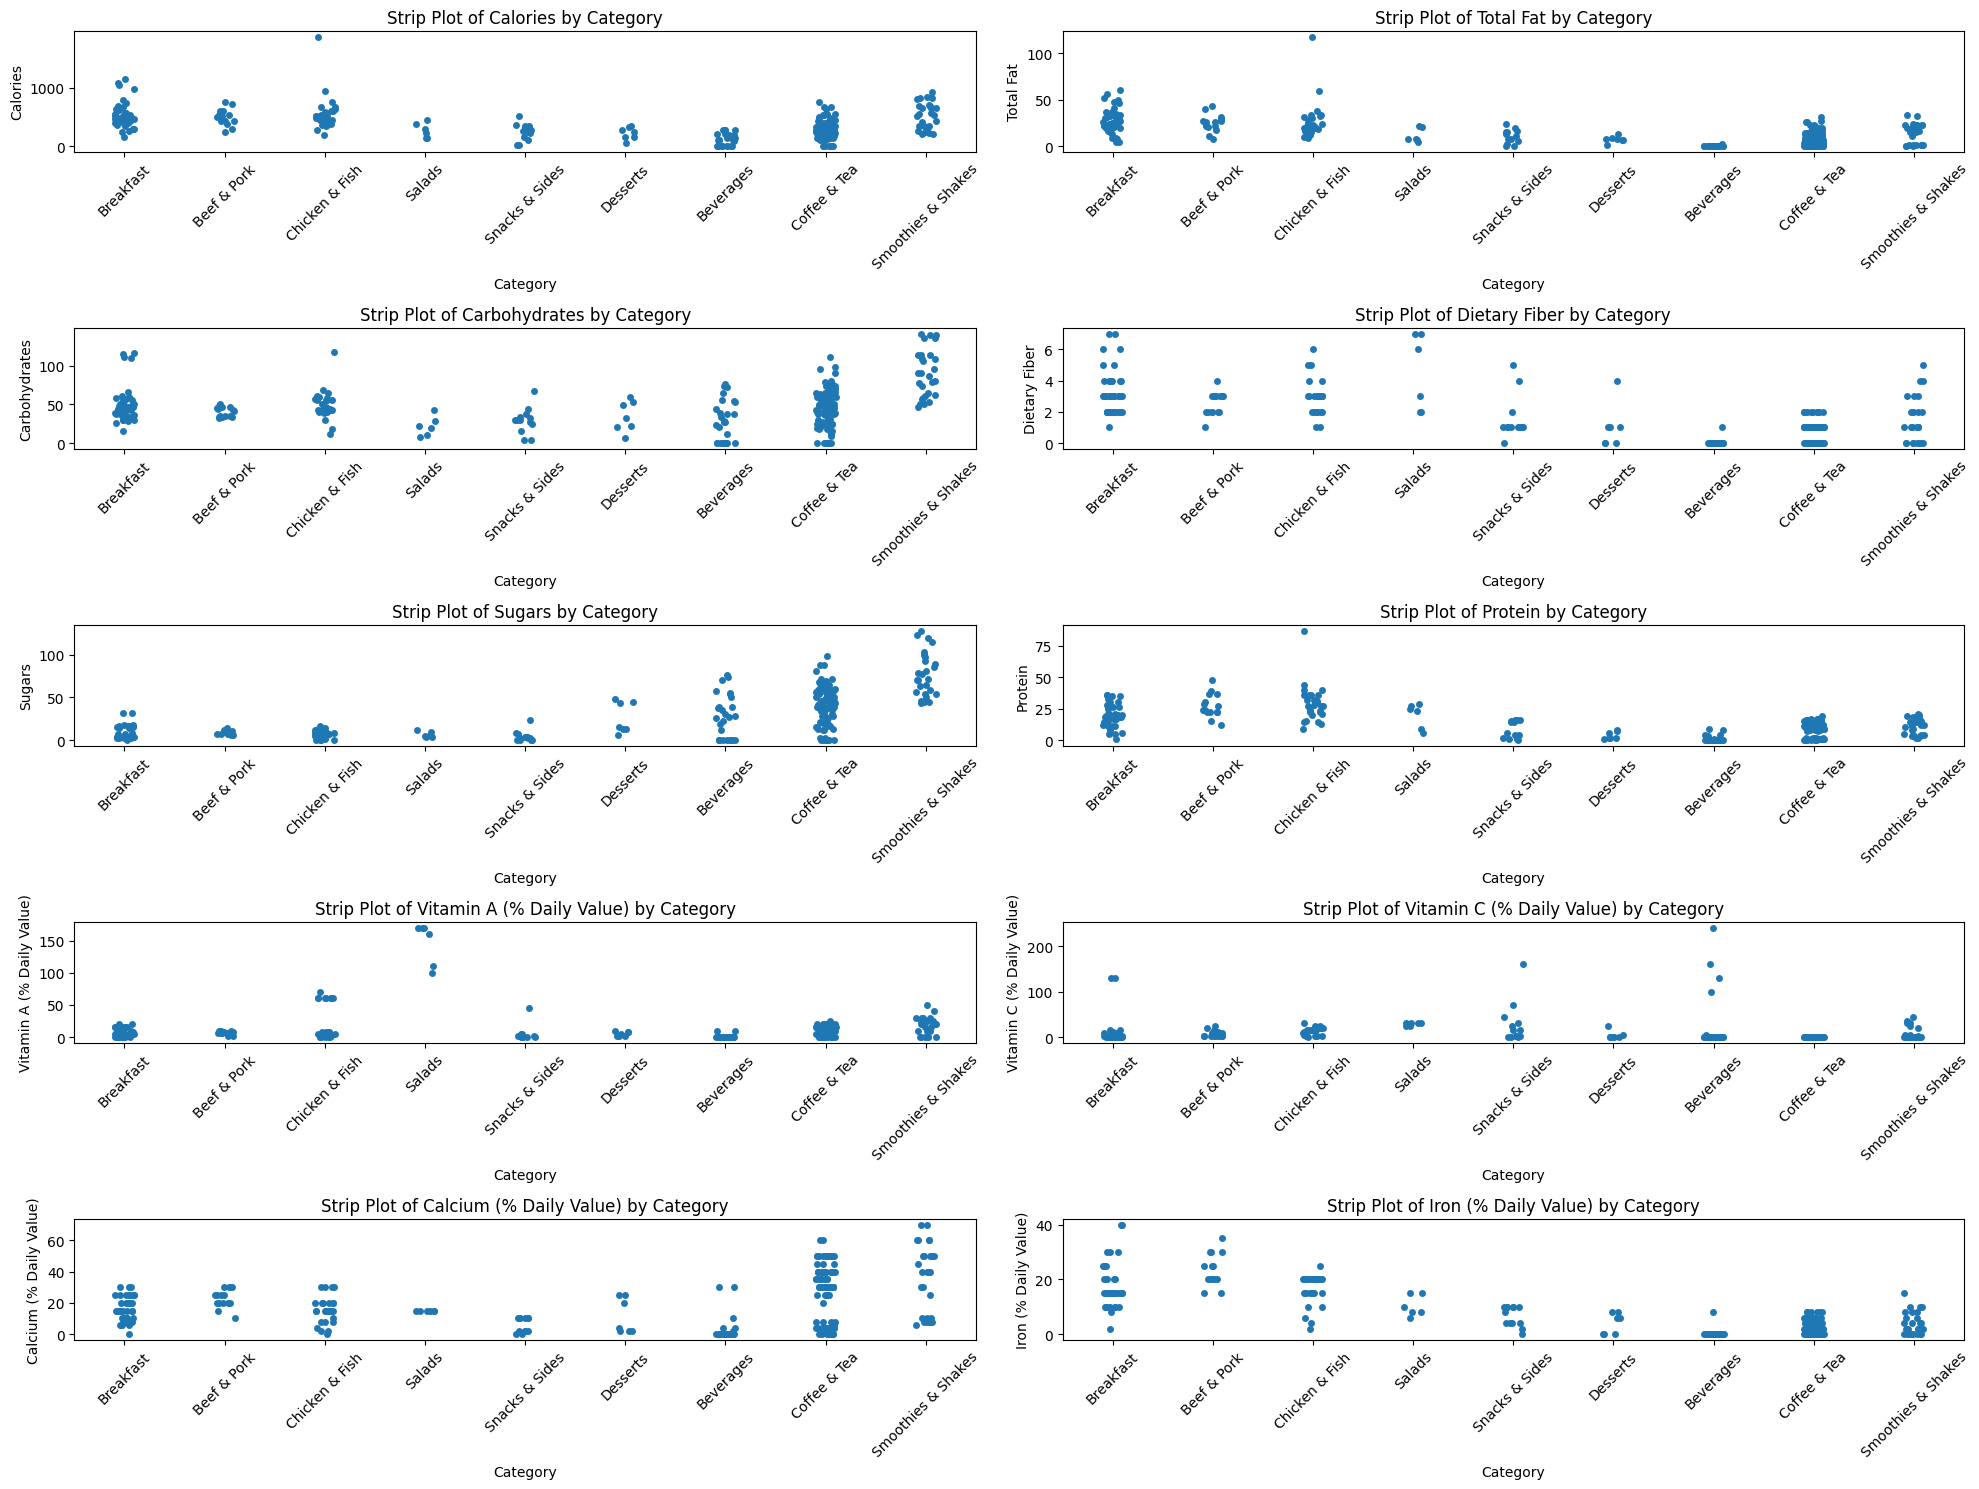

In [ ]:
'''
Q.6: Draw Stripplot for each
category against the following attributes ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein',
'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)'.
'''
# Define the size of the overall figure
plt.figure(figsize=(20, 15))

# List of attributes for which to create strip plots

# Create a strip plot for each attribute
for i, attribute in enumerate(attributes, 1):
    plt.subplot(5, 2, i)
    sns.stripplot(x='Category', y=attribute, data=menu_data, jitter=True)
    plt.title(f'Strip Plot of {attribute} by Category')
    plt.xlabel('Category')
    plt.ylabel(attribute)
    plt.xticks(rotation=45)

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()


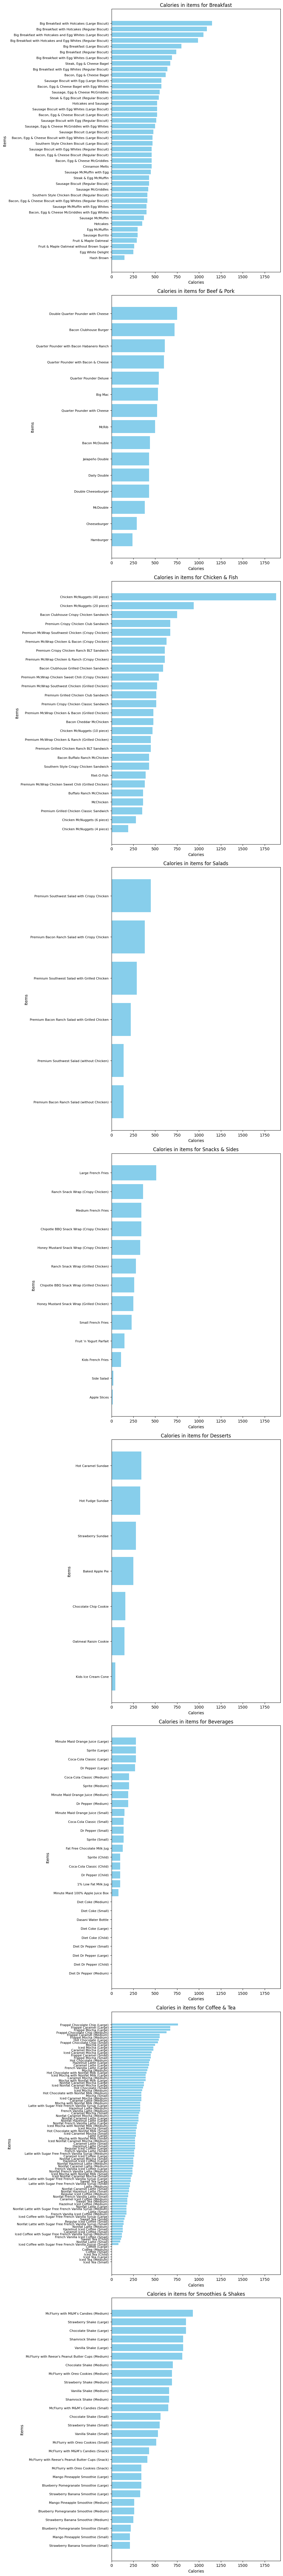

In [ ]:
'''
Q.7: Draw a horizontal bar graph for items in each category against the calories.
'''

# Create a figure to hold all the subplots
fig, axes = plt.subplots(len(categories), 1, figsize=(10, 10 * len(categories)))

# If there's only one category, axes will not be an array, fix this for consistency
if len(categories) == 1:
    axes = [axes]

# Loop through each category and create a horizontal bar graph for each
for ax, category in zip(axes, categories):
    # Filter the dataframe by category
    category_df = menu_data[menu_data['Category'] == category]

    # Sort values so the bars are in descending order
    category_df = category_df.sort_values('Calories', ascending=True)

    # Create horizontal bar graph
    ax.barh(category_df['Item'], category_df['Calories'], color='skyblue')
    ax.set_title(f'Calories in items for {category}')
    ax.set_xlabel('Calories')
    ax.set_ylabel('Items')
    ax.set_xlim(0, menu_data['Calories'].max() + 50)  # Set x-axis limit a bit higher than max calories

    # Set y-tick labels to a smaller font size to prevent overlapping
    ax.tick_params(axis='y', labelsize=8)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


A few things to note from these graphs are:

    Items in several categories, such as "Chicken & Fish" and "Smoothies & Shakes," have calorie counts that range widely, from very high to quite low.
    With fewer high-calorie alternatives, other categories like "Salads" and "Snacks & Sides" typically have lower overall calorie counts.
    The highest calorie items in categories like "breakfast," which have a wide range of calorie counts, tend to be much higher than the rest. This could mean that some things are present that are significantly richer in calories.
    The 'Beverages' category contains a wide range of items, some of which have very few calories and others that have quite a number. This variance is mostly due to the size of the drink and whether it is a regular or diet version.


